## Import Modules 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Change The Indicators here..

In [2]:
name_dataset = 'GGRM-long'
column_dataset_obs = 'Close'
p = 1
d = 1
q = 2

## read Dataset

/var/folders/lv/j9w__j_11b1cntk8h5tlnkvr0000gn/T/ipykernel_59582/1752154444.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')


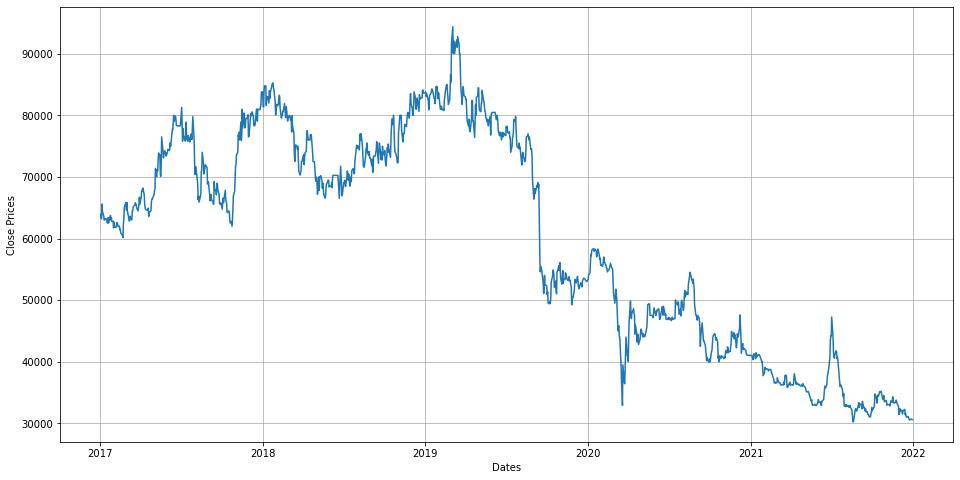

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')
data = pd.read_csv('../Datasets/'+name_dataset+'.csv', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
#data = data.loc['2012-11-10':'2017-11-10']
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs]);

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1262 entries, 2017-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1262 non-null   int64  
 1   High       1262 non-null   int64  
 2   Low        1262 non-null   int64  
 3   Close      1262 non-null   int64  
 4   Adj Close  1262 non-null   float64
 5   Volume     1262 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 69.0 KB


## Plotting Data

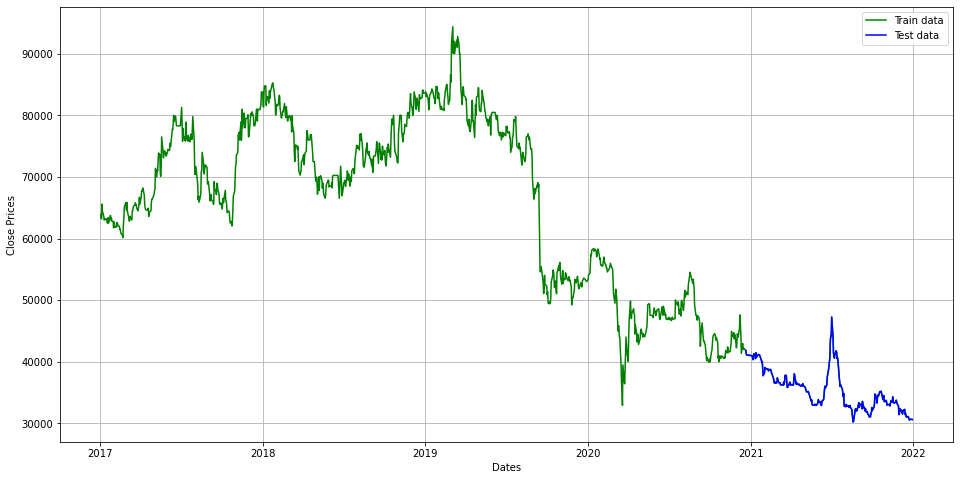

In [5]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs], 'green', label='Train data')
plt.plot(test_data[column_dataset_obs], 'blue', label='Test data')
plt.legend()

In [6]:
print("Jumlah Train Data: " + str(len(train_data)))
print("Jumlah Test Data: " + str(len(test_data)))

Jumlah Train Data: 1009
Jumlah Test Data: 253


## ARIMA Model

In [7]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 14, 8
# data_arima = data['Open']
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
# plt.figure(figsize=(16,8))
# fig = result.plot()
# plt.show()

In [8]:
train_arima = train_data[column_dataset_obs]
test_arima = test_data[column_dataset_obs]

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [9]:
model

### Report Performance of ARIMA Predictions

In [10]:
# mse = mean_squared_error(y, predictions)
# print('MSE: '+str(mse))
print('P: ' + str(p))
print('D: ' + str(d))
print('Q: ' + str(q))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+ str("{:.2f}".format(rmse)))
mae = mean_absolute_error(y, predictions)
print('MAE: '+ str("{:.2f}".format(mae)))
mape = mean_absolute_percentage_error(y, predictions)
print('MAPE: '+ str("{:.2f}".format(mape*100)) + '%')

P: 1
D: 1
Q: 2
RMSE: 663.52
MAE: 423.99
MAPE: 1.18%


### Plotting Prediction of ARIMA

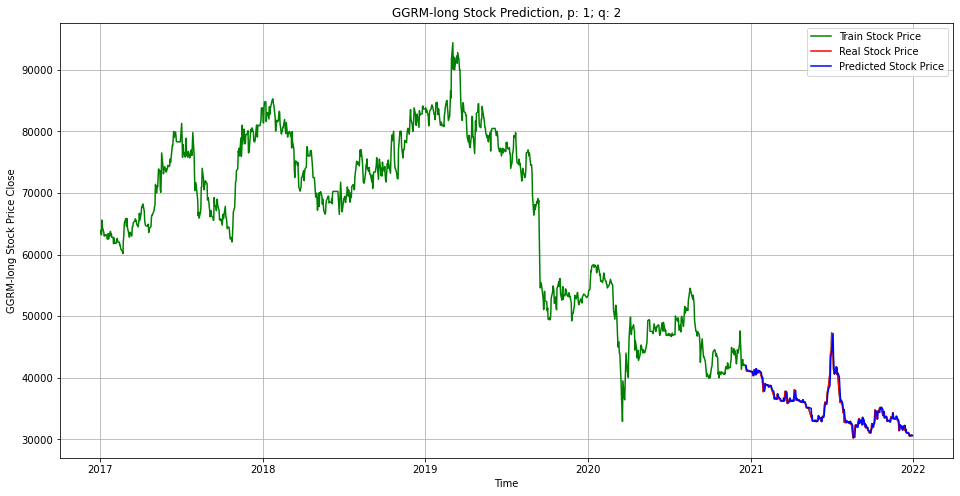

In [11]:
plt.figure(figsize=(16,8))
plt.plot(data.index[:], data[column_dataset_obs], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(name_dataset +' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(name_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
# plt.savefig('arima_model.pdf')
plt.show()

In [12]:
predictions,

([array([42012.20466233]),
  array([41840.35596772]),
  array([41326.74437927]),
  array([41098.76887824]),
  array([41031.53932388]),
  array([41063.69782157]),
  array([40978.30383451]),
  array([40981.64212711]),
  array([40706.69878399]),
  array([40352.2561016]),
  array([40357.74953083]),
  array([41218.58212702]),
  array([41162.1502021]),
  array([40472.99539449]),
  array([41456.52078612]),
  array([40726.58709252]),
  array([40811.64118604]),
  array([41148.09879936]),
  array([41125.70869116]),
  array([41046.08238876]),
  array([41054.3930633]),
  array([40829.83708868]),
  array([40252.79661061]),
  array([39954.65183363]),
  array([40035.03660604]),
  array([38923.70766492]),
  array([37804.92086311]),
  array([38274.84471199]),
  array([39004.89653637]),
  array([38744.14010396]),
  array([38776.30873892]),
  array([38845.1374774]),
  array([38768.43525735]),
  array([38752.55588482]),
  array([38480.04781453]),
  array([38715.76084925]),
  array([38686.22332634]),
  arr

## Visualize Test Data The Prediction and Real

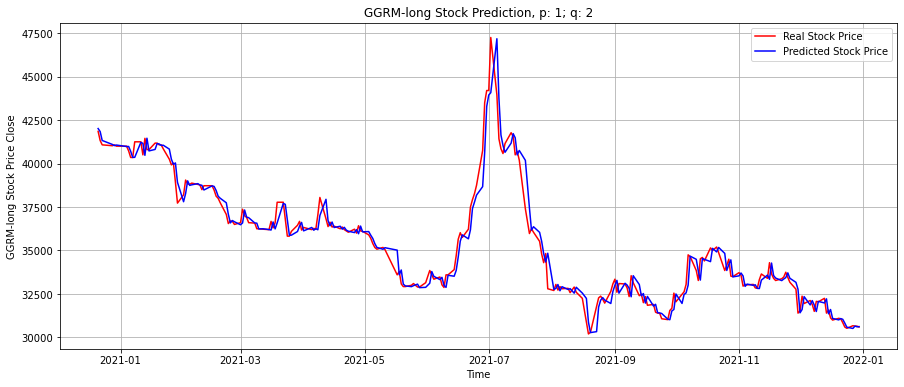

In [13]:
plt.figure()
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(name_dataset +' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(name_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
# plt.savefig('arima_model.pdf')
plt.show()

In [14]:
price_prediction=np.concatenate(predictions)

In [15]:
new_date = pd.to_datetime(test_data.index)

## Save as new Dataset

In [16]:
new_data = {'Date': new_date,
            'real_price': y,
           'Close_ARIMA': price_prediction}

In [17]:
df_new_data = pd.DataFrame(new_data, columns = ['Date', 'real_price','Close_ARIMA'])

print(df_new_data)

                 Date  real_price   Close_ARIMA
Date                                           
2020-12-21 2020-12-21       41850  42012.204662
2020-12-22 2020-12-22       41325  41840.355968
2020-12-23 2020-12-23       41075  41326.744379
2020-12-28 2020-12-28       41025  41098.768878
2020-12-29 2020-12-29       41075  41031.539324
...               ...         ...           ...
2021-12-24 2021-12-24       30525  30589.886514
2021-12-27 2021-12-27       30675  30517.583711
2021-12-28 2021-12-28       30650  30654.333738
2021-12-29 2021-12-29       30650  30612.768123
2021-12-30 2021-12-30       30600  30622.276495

[253 rows x 3 columns]


In [18]:
df_new_data.to_csv('../Datasets/dataset after prediction/'+name_dataset+'_ARIMA_'+ str(p) +'_'+ str(q) + '.csv', index=False)